#RDI - 26/03/2024
##abordagem prática dos conceitos visto sobre segurança da internet *et al*.



---
##Análise de Dados de Criptomoedas com Python
Vamos continuar a analise de dados no campo das Cryptos, porém avançando nos conceitos de segurança.

---
##Introdução às APIs
Antes de mergulharmos no código, é essencial entender o que é uma API. API significa "Application Programming Interface" (Interface de Programação de Aplicações). Uma API permite que dois aplicativos se comuniquem entre si. Neste caso, utilizaremos a API do CoinMarketCap para obter dados de criptomoedas.

Para acessar a API do CoinMarketCap, você precisará de uma chave de API, que é uma credencial que permite que seu código se autentique com a API. Você pode obter sua própria chave de API registrando-se no site do CoinMarketCap e acessando a seção de desenvolvedores


```
Não vou cometer o mesmo erros e liberar miha API. Tá engraçadinho né, Gênio !!
```
Vamos ao site e criem suas chaves




#Início da Festa!

##Importem as bibliotecas.



```
import requests
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
```



## IPython.display . Já conheciam? Ou pensam só no Pandinha?

O **IPython.display** é um módulo que oferece funções para exibir dados de forma mais interativa e visualmente atrativa em ambientes como Jupyter Notebook ou Google Colab.

A função display é usada para mostrar objetos Python de maneira mais elaborada do que simplesmente imprimi-los, tornando a apresentação de dados mais rica e interativa.

Para usar a função display, basta chamá-la e passar o objeto que deseja exibir como argumento. Por exemplo, para mostrar um DataFrame do pandas de forma estilizada em um notebook, você pode usar:



```
from IPython.display import display
display(df.head(10).style.set_table_styles([...]))
```

Aqui, Gênios, um exemplo genérico.
Para saber
mais paramêtros da função display, peça ajuda:

```
help(display)
```


---





##Definindo a URL da API e o Cabeçalho de Solicitação



```
url = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest"

headers = {'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': 'sua_chave_de_api_aqui',}
```




## Me lembra aí, Prof. Ficou meio tenso aqui!

###Veja os detalhes, turma:

**URL da API:** A URL especificada é "https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest", que é a URL base para acessar os dados mais recentes sobre listagens de criptomoedas.

**Cabeçalhos (Headers):** Os cabeçalhos são informações adicionais que são enviadas junto com a solicitação HTTP. Neste caso, existem dois cabeçalhos especificados:

*   Accepts: Este cabeçalho especifica o tipo de conteúdo que o cliente (você, neste caso) está disposto a aceitar da resposta do servidor. Aqui, é definido como "application/json", o que significa que o cliente prefere receber os dados no formato JSON.

*   X-CMC_PRO_API_KEY: Este é um cabeçalho personalizado usado pelo CoinMarketCap para autenticação. Ele espera que você forneça uma chave de API válida como seu valor. Sem essa chave, a solicitação pode ser recusada pelo servidor.


**Chave da API:** O valor 'sua_chave_de_api_aqui' precisa ser substituído pela sua chave de API real fornecida pelo CoinMarketCap quando você se registrar para acessar sua API.




###Oremos...ops...Continuemos!


---

##Requisição, conversão para Data Frame e Limpeza básica.

1. REQUISIÇÃO



```
df['price'] = df['quote'].apply(lambda x: x['USD']['price'])
df['volume_24h'] = df['quote'].apply(lambda x: x['USD']['volume_24h'])
df = df.drop('quote', axis=1)

```
Quase igual fizemos na aula passada, vejam que utilizando o método get da biblioteca requests, fazemos uma chamada à API e obtemos a resposta. Em seguida, convertemos essa resposta, q**ue vem em formato JSON**, em um objeto Python para manipulação.

Mas vai vendo!!!



##Requisiação e *JSON*



```
response = requests.get(url, headers=headers)
data = response.json()

```
* JSON (JavaScript Object Notation) é um formato de texto simples para troca de dados. Ele é amplamente utilizado para enviar dados entre um servidor e um cliente na web e é bastante comum em APIs, como a que você está acessando. A estrutura de um JSON é muito semelhante à estrutura de dados de um objeto em JavaScript.

* Por outro lado, em Python, temos uma estrutura de dados chamada de dicionário (dictionary), que é semelhante a um objeto JavaScript. Um dicionário em Python é uma coleção de pares chave-valor, onde cada chave é única e mapeia para um valor.

* Quando você usa o método json() em um objeto de resposta da biblioteca requests em Python, ele interpreta o conteúdo da resposta, que está no formato JSON, e o converte em um objeto Python, normalmente um dicionário ou uma lista (quando o JSON é um array). Essa conversão é realizada automaticamente pela biblioteca requests quando você chama response.json().

* Uma vez que os dados estão em um objeto Python, você pode manipulá-los facilmente usando as estruturas de controle de Python, como loops, condicionais, funções e assim por diante. Você também pode acessar os dados usando a notação de colchetes ([]) para chaves de dicionário ou índices de lista, o que torna a manipulação dos dados muito conveniente.

**Em resumo, a conversão de JSON para um objeto Python facilita muito a manipulação e análise de dados em Python, permitindo que você os utilize em seu código de forma eficiente e sem complicações.**






---
##Conversão de Dados para DataFrame


```
df = pd.DataFrame(data['data'])
df = df[['name', 'symbol', 'quote']]
```

Aqui, convertemos os dados obtidos em um DataFrame do pandas, que é uma estrutura de dados bidimensional semelhante a uma tabela.
Selecionamos as colunas que são relevantes para nossa análise.

##Extração e Limpeza de Dados



```
df['price'] = df['quote'].apply(lambda x: x['USD']['price'])
df['volume_24h'] = df['quote'].apply(lambda x: x['USD']['volume_24h'])
df = df.drop('quote', axis=1)
```



Neste passo, extraímos informações específicas de preço e volume de negociação das últimas 24 horas.

###Alerta do Prof.: removemos a coluna 'quote' não é mais necessária.


##Agora vem a cerejinha



```
def highlight_columns(s):
    return ['background-color: #a2d2ff' if s.name in ['price', 'volume_24h'] else '' for v in s]

df_styled = df.head(10).style.apply(highlight_columns) \
    .set_table_styles([{'selector': 'th', 'props': [('background', '#0077b6'), ('color', 'white')]},]) \
    .set_properties(**{'text-align': 'center', 'font-size': '12pt'}) \
    .set_caption("Top 10 Criptomoedas")

display(df_styled)

```
 Aplicamos estilos diferentes para as células, destacando as colunas 'price' e 'volume_24h'. Definimos cores de fundo e de texto, alinhamento, tamanho de fonte e um cabeçalho para a tabela.
Se precisar de ajuda, chama o Help, Gênio!



---



Para fechar com chve de ouro!!! Um gráfico bem bonitinho. Lembre-se. Aqui é o final de tudo, onde você apresenta o resultado de toda essa trabalheira. Divirtam-se e experimente,mm utras formas que sejam válidas.

#*The end*

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [3]:
url = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest"

headers = {'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '129fcc38-2b79-44f6-8373-bbe8f235810e',}

In [4]:
response = requests.get(url, headers=headers)
data = response.json()

In [5]:
df = pd.DataFrame(data['data'])
df = df[['name', 'symbol', 'quote']]

In [6]:
df['price'] = df['quote'].apply(lambda x: x['USD']['price'])
df['volume_24h'] = df['quote'].apply(lambda x: x['USD']['volume_24h'])
df = df.drop('quote', axis=1)

In [7]:
def highlight_columns(s):
    return ['background-color: #a2d2ff' if s.name in ['price', 'volume_24h'] else '' for v in s]

df_styled = df.head(15).style.apply(highlight_columns) \
    .set_table_styles([{'selector': 'th', 'props': [('background', '#0077b6'), ('color', 'white')]},]) \
    .set_properties(**{'text-align': 'center', 'font-size': '12pt'}) \
    .set_caption("Top 15 Criptomoedas")

display(df_styled)

,name,symbol,price,volume_24h
0,Bitcoin,BTC,69648.016826,40115184380.350967
1,Ethereum,ETH,3568.999421,20223690318.167217
2,Tether USDt,USDT,1.000420,82978645631.492111
3,BNB,BNB,575.607935,2129694048.754682
4,Solana,SOL,187.451591,3633016825.305590
5,XRP,XRP,0.630485,2173753325.364369
6,USDC,USDC,1.000195,8485475629.221347
7,Dogecoin,DOGE,0.176304,2922574193.128036
8,Cardano,ADA,0.655879,642819657.205052
9,Avalanche,AVAX,55.714974,885888101.446308


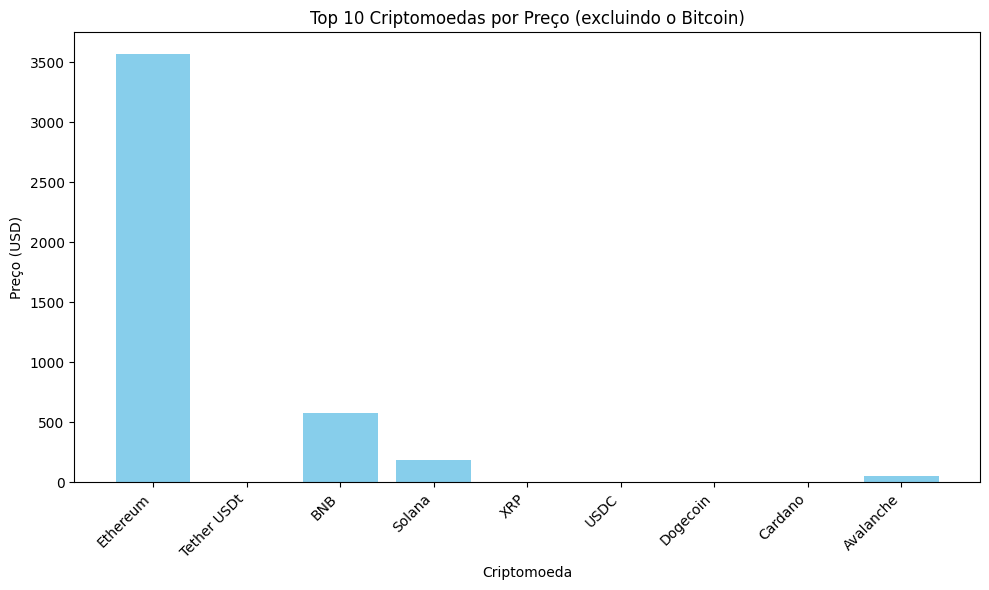

In [21]:
names = df['name'].head(10)[1:]
prices = df['price'].head(10)[1:]

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(names, prices, color='skyblue')

# Personalizar o gráfico
plt.title('Top 10 Criptomoedas por Preço (excluindo o Bitcoin)')
plt.xlabel('Criptomoeda')
plt.ylabel('Preço (USD)')
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos no eixo x para melhor visualização

# Mostrar o gráfico
plt.tight_layout()
plt.show()